In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from utils import mnist_reader

seed = 1234
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

label_dict = { 0: "T-Shirt/Top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle Boot"}

In [2]:
print(f'X_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}\nX_train Shape: {X_train.shape}\ny_train Shape: {y_train.shape}')

X_test Shape: (10000, 784)
y_test Shape: (10000,)
X_train Shape: (60000, 784)
y_train Shape: (60000,)


In [12]:
# Create validation sets from the first 10,000 images
X_val = X_train[:10000]
y_val = y_train[:10000]

# Start training sets from the 10,001th image to accomodate validation set
X_train = X_train[10000:]
y_train = y_train[10000:] 

# Start training sets from the 10,001th image to the 20,000th image as a subset of the data
X_train_subset = X_train[10000:20000]
y_train_subset = y_train[10000:20000]

In [3]:
def visualize(y_labels: np.array) -> None:
    # Some default settings for our plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    # Create a figure with 3 rows and 3 columns
    figure, axes = plt.subplots(3, 3, figsize=(6, 6))  

    n = 0
    for row in range(len(axes)):
        for col in range(len(axes[0])):
            axes[row][col].set_title(f' Label: {label_dict[y_labels[n]]}')
            axes[row][col].imshow(X_train[n].reshape(28, 28))
            n += 1

    plt.tight_layout()

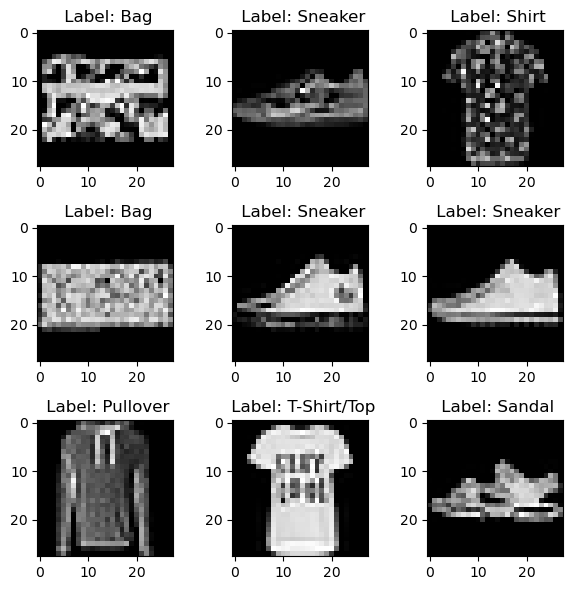

In [5]:
visualize(y_train)

In [6]:
cs = [1.0, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]

train_accuracies = []
test_accuracies = []

# classifier = StandardScaler()
# classifier.fit(X_train_subset, y_train_subset)

# X_train_subset = classifier.transform(X_train_subset)
# X_val = classifier.transform(y_train_subset)


for c in cs:
    lr = LogisticRegression(penalty="l2", C = c, max_iter= 250, solver="liblinear", random_state=seed).fit(X_train_subset[:5000], y_train_subset[:5000])
    # print('finished')
    y_lr_pred = lr.predict(X_train_subset) 
    y_val_pred = lr.predict(X_val)

    train_score = accuracy_score(y_lr_pred, y_train_subset)
    val_score = accuracy_score(y_val_pred, y_val)

    train_accuracies.append(train_score)
    test_accuracies.append(val_score)

    # visualize(y_lr_pred)
    print(f'C = {c} --> {train_score} | {val_score}')
    # print(f'C = {c} validation score--> {val_score}')


# fig, axes = plt.subplots()
# axes.semilogx(cs, train_accuracies, color='red', label='training accuracy')
# axes.semilogx(cs, test_accuracies, color='blue', label='testing accuracy')

# axes.set_xlabel('regularization strength', fontsize=14)
# axes.set_ylabel('accuracy', fontsize=14)

# axes.legend()



C = 1.0 --> 0.8645 | 0.7296
C = 0.75 --> 0.8658 | 0.7348
C = 0.5 --> 0.8657 | 0.7346
C = 0.25 --> 0.868 | 0.739
C = 0.1 --> 0.8704 | 0.7454
C = 0.05 --> 0.8732 | 0.7504
C = 0.01 --> 0.8777 | 0.7613


Liblinear L1 Logistic Regression Training Score: 0.8804
Liblinear L1 Logistic Regression Validation Score: 0.8165


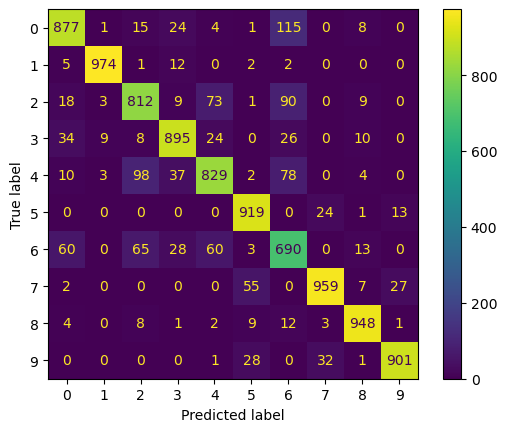

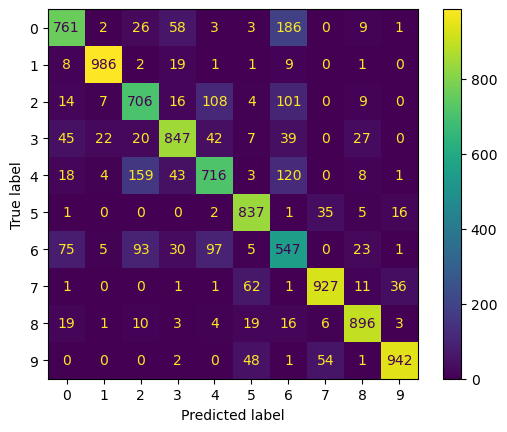

In [16]:
lr = LogisticRegression(penalty="l1", C = 0.01, max_iter= 250, solver="liblinear").fit(X_train_subset[:5000], y_train_subset[:5000])
y_lr_pred = lr.predict(X_train_subset) 
y_val_pred = lr.predict(X_val)

train_score = accuracy_score(y_lr_pred, y_train_subset)
val_score = accuracy_score(y_val_pred, y_val)

print(f'Liblinear L1 Logistic Regression Training Score: {train_score}')
print(f'Liblinear L1 Logistic Regression Validation Score: {val_score}')
train_matrix = ConfusionMatrixDisplay(confusion_matrix(y_lr_pred, y_train_subset), display_labels=lr.classes_)
val_matrix = ConfusionMatrixDisplay(confusion_matrix(y_val_pred, y_val), display_labels=lr.classes_)

train_matrix.plot()
val_matrix.plot()

In [13]:
classifier = StandardScaler()
classifier.fit(X_train_subset, y_train_subset)

scaled_X_tr = classifier.transform(X_train_subset)
scaled_X_val = classifier.transform(X_val)

In [14]:
# ns = [1,2,3,4,5,6,7,8,9,10]
ns = [1,2,3,4,5,6,7,8,9,10, 12, 20, 50, 100, 500, 1000]

batch_size = [16, 32, 64, 128, 256]
# train_accuracies = []

# test_accuracies = []

# classifier = StandardScaler()
# classifier.fit(X_train_subset, y_train_subset)


for n in ns:
    #n_neighbors default = 5
    #weights = "uniform"
    #algorithm = "auto"
    #leaf_size = 30 -> doesn't affect outcome of queries
    #metric = minkowski
    kn = KNeighborsClassifier(n_neighbors = n).fit(scaled_X_tr, y_train_subset)
    # kn = KNeighborsClassifier(n_neighbors = n, weights = "uniform", metric="L1").fit(scaled_X_tr, scaled_X_val)
    # print('finished')
    y_kn_pred = kn.predict(scaled_X_tr) 
    y_val_pred = kn.predict(scaled_X_val)

    train_score = accuracy_score(y_kn_pred, y_train_subset)
    val_score = accuracy_score(y_val_pred, y_val)

    # visualize(y_lr_pred)
    print(f'k = {n} --> {train_score}, {val_score}')
    # print(f'k = {n} validation score -->{val_score}')

k = 1 --> 1.0, 0.8116
k = 2 --> 0.9193, 0.8148
k = 3 --> 0.8987, 0.821
k = 4 --> 0.8886, 0.8227
k = 5 --> 0.8759, 0.8231
k = 6 --> 0.8689, 0.8239
k = 7 --> 0.8594, 0.8212
k = 8 --> 0.8584, 0.8229
k = 9 --> 0.8497, 0.8198
k = 10 --> 0.8483, 0.8214
k = 12 --> 0.842, 0.8196
k = 20 --> 0.8226, 0.8114
k = 50 --> 0.7951, 0.7917
k = 100 --> 0.7734, 0.7742
k = 500 --> 0.7148, 0.7157
k = 1000 --> 0.6678, 0.6693


6-NearestNeighbors Distance Weight Training Score: 0.9088
6-NearestNeighbors Distance Weight Validation Score: 0.8208


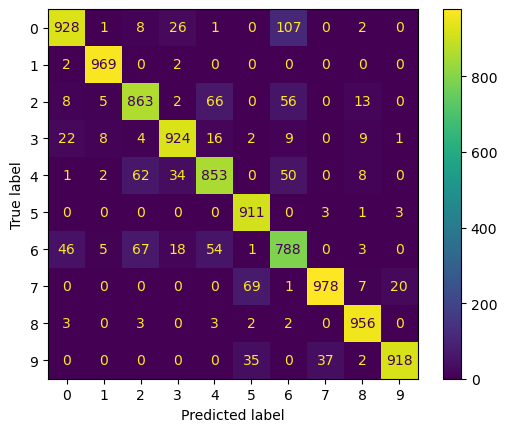

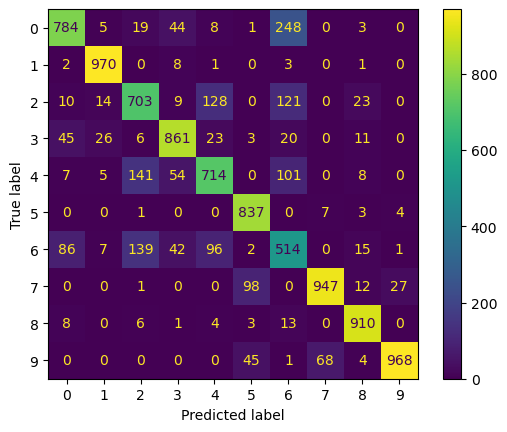

In [39]:
kn = KNeighborsClassifier(n_neighbors = 6, weights = "distance", metric="l1").fit(X_train_subset[:5000], y_train_subset[:5000])
y_kn_pred = kn.predict(X_train_subset) 
y_val_pred = kn.predict(X_val)

train_score = accuracy_score(y_kn_pred, y_train_subset)
val_score = accuracy_score(y_val_pred, y_val)

print(f'6-NearestNeighbors Distance Weight Training Score: {train_score}')
print(f'6-NearestNeighbors Distance Weight Validation Score: {val_score}')
train_matrix = ConfusionMatrixDisplay(confusion_matrix(y_kn_pred, y_train_subset), display_labels=kn.classes_)
val_matrix = ConfusionMatrixDisplay(confusion_matrix(y_val_pred, y_val), display_labels=kn.classes_)

train_matrix.plot()
val_matrix.plot()

In [16]:
# lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
# bs = [16, 32, 48, 64, 80, 96, 112, 128, 256, 512]
hidden = [(200,), (100, 100), (300,), (300, 300), (300, 200), (300, 200, 50), (300, 200, 100), \
          (200, 200), (100, 100, 100), (400, ), (400, 300), (400, 300, 200), (100, 200), (200, 300), \
            (100, 200, 300), (100, 200, 300, 400), (100, 200, 300, 400, 500), (300, 400), (100, 200, 300, 400, 500, 600)]
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

for h in hidden:
    clf = MLPClassifier(activation="relu", learning_rate_init=0.001, batch_size=48, hidden_layer_sizes=h, random_state=seed).fit(scaled_X_tr, y_train_subset)
    # clf = MLPClassifier(batch_size= 128, hidden_layer_sizes=(100,200,300,400,500), alpha = al).fit(X_train_subset, y_train_subset)
    y_clf_pred = clf.predict(scaled_X_tr) 
    y_val_pred = clf.predict(scaled_X_val)

    train_score = accuracy_score(y_clf_pred, y_train_subset)
    val_score = accuracy_score(y_val_pred, y_val)

        # visualize(y_lr_pred)
    print(f'hl = {h} --> {train_score}, {val_score}')
    #print(train_score)
    #print(val_score)

hl = (200,) --> 0.9969, 0.8599
hl = (100, 100) --> 1.0, 0.8722
hl = (300,) --> 1.0, 0.8704
hl = (300, 300) --> 0.99, 0.8609
hl = (300, 200) --> 0.9983, 0.8689


c:\Users\Andy Nguyen\miniconda3\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


hl = (300, 200, 50) --> 1.0, 0.8721
